**PROBLEM STATEMENT**

A food delivery service is facing challenges in achieving profitability across its operations. With a dataset of 1,000 food orders, the service seeks to understand the dynamics of its cost structure and profitability to identify strategic opportunities for improvement.

The dataset contains comprehensive details on food orders, including Order ID, Customer ID, Restaurant ID, Order and Delivery Date and Time, Order Value, Delivery Fee, Payment Method, Discounts and Offers, Commission Fee, Payment Processing Fee, and Refunds/Chargebacks. This data provides a foundation for analyzing the cost structure and profitability of the food delivery service.

**IMPORTING THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('/content/food_orders_new_delhi (1).csv')
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [4]:
data.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [5]:
data['Order Date and Time'].value_counts()

Order Date and Time
2024-02-01 01:11:52    1
2024-02-01 01:57:47    1
2024-01-20 08:57:59    1
2024-01-21 14:39:12    1
2024-01-23 04:56:36    1
                      ..
2024-01-30 12:41:54    1
2024-02-03 19:40:51    1
2024-02-05 02:18:01    1
2024-01-16 13:30:13    1
2024-01-08 14:46:43    1
Name: count, Length: 1000, dtype: int64

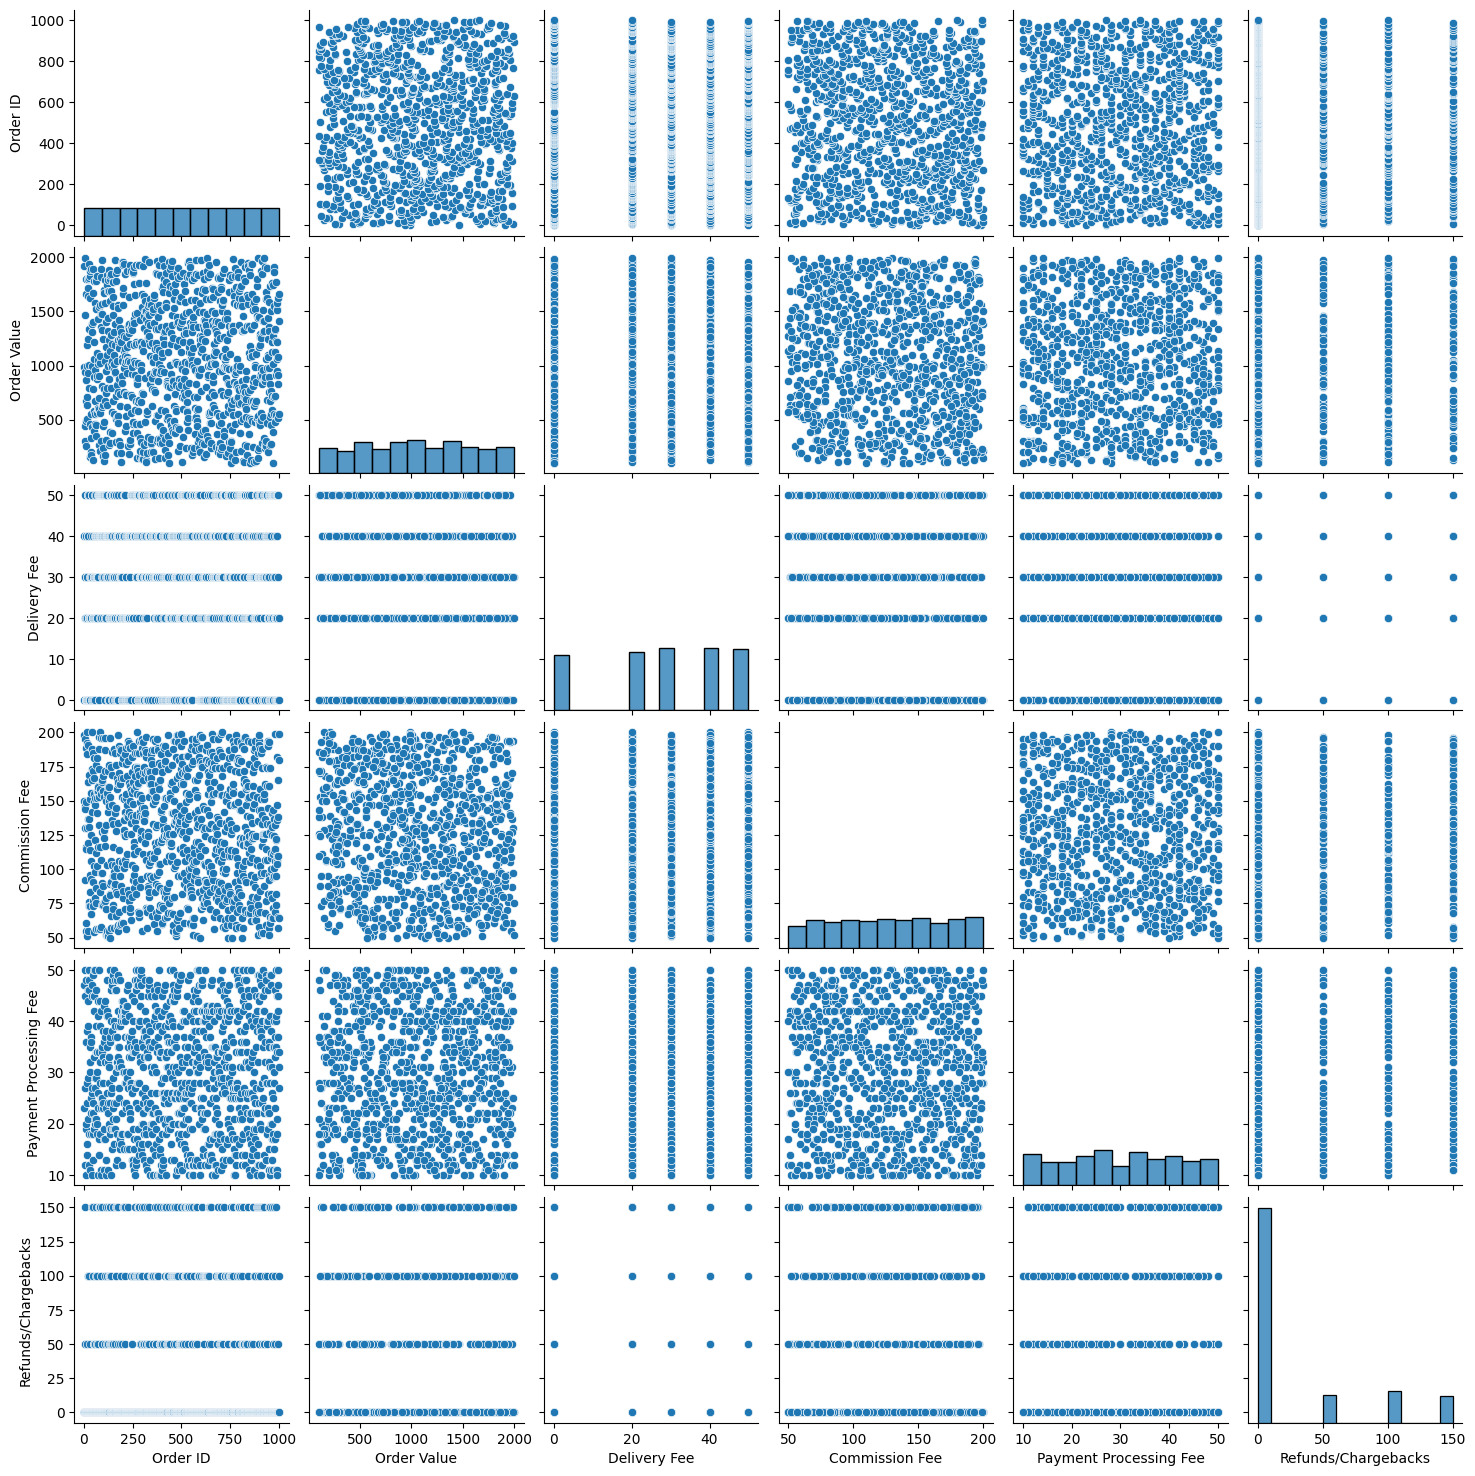

In [6]:
sns.pairplot(data)
plt.show()

In [31]:
# extrating numeric values from text

def extract_discount(discount_str):
    if pd.isnull(discount_str):
        return np.nan
    elif isinstance(discount_str, int):
        return discount_str
    elif 'off' in discount_str:
        return int(discount_str.split(' ')[0])
    elif '%' in discount_str:
        return int(discount_str.split('%')[0])
    else:
        return 0

data['Discount Value'] = data['Discounts and Offers'].apply(extract_discount)

data['Discount Percentage'] = data['Discounts and Offers'].apply(lambda x: extract_discount(x))

data['Discount Amount'] = data.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

data['Discount Amount'] = data.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

For the cost analysis, we’ll consider the following costs associated with each order:

Delivery Fee: The fee charged for delivering the order.

Payment Processing Fee: The fee for processing the payment.

Discount Amount: The discount provided on the order.

We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [35]:
data['Total Costs'] = data['Delivery Fee'] + data['Payment Processing Fee'] + data['Discount Amount']
data['Revenue'] = data['Commission Fee']
data['Profit'] = data['Revenue'] - data['Total Costs']

In [36]:
total_orders = data.shape[0]
total_revenue = data['Revenue'].sum()
total_costs = data['Total Costs'].sum()
total_profit = data['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 221741.84999999998, 'Total Profit': -117943.85}


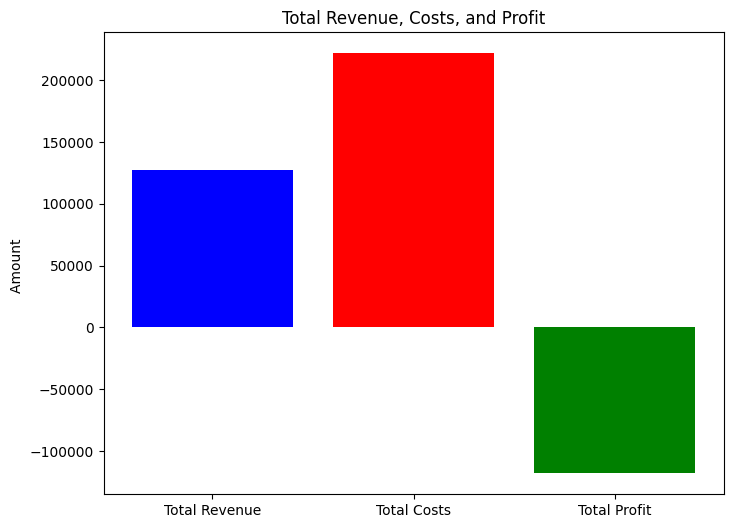

In [45]:
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['blue', 'red', 'green'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount ')
plt.show()

**The business is currently not Profitable. Total Cost is almost twice higher than Revenue. Let's have a closer look on money issue distibution.**

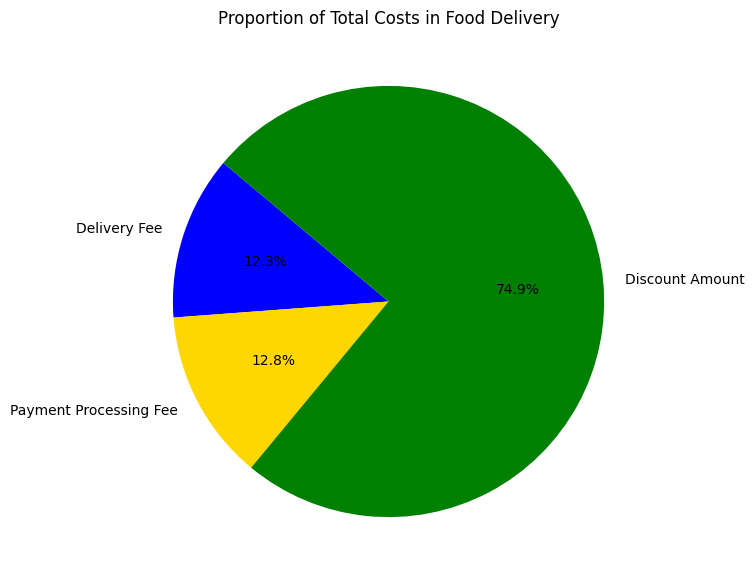

In [44]:
costs_breakdown = data[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'gold', 'green'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

**The main reason why business is not profitable due to discounts and offers (75%).**
**Not enough information, why there are so many different types of discounts, since only 18% of orders are without any promotion sales**

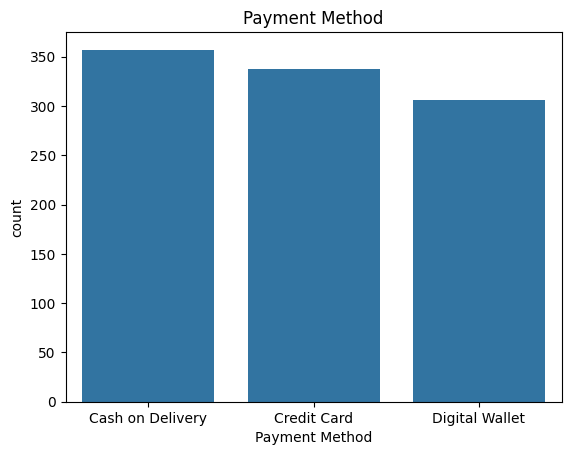

In [43]:
counts = data["Payment Method"].value_counts()
fig, axes = plt.subplots()
counts = pd.DataFrame(counts)
counts = counts.sort_values("count", ascending=False)
sns.barplot(x=counts.index, y=counts.iloc[:, 0], ax=axes)
plt.title("Payment Method")
plt.show()

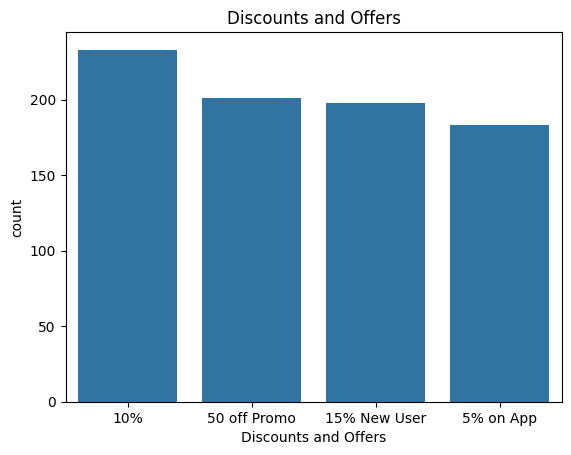

In [42]:
counts = data["Discounts and Offers"].value_counts()
fig, axes = plt.subplots()
counts = pd.DataFrame(counts)
counts = counts.sort_values("count", ascending=False)
sns.barplot(x=counts.index, y=counts.iloc[:, 0], ax=axes)
plt.title("Discounts and Offers")
plt.show()

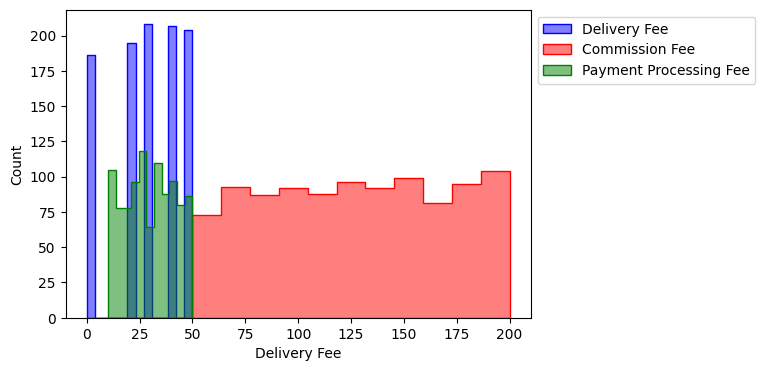

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(data['Delivery Fee'], kde=False, color='blue', label='Delivery Fee', alpha=0.5, element="step")
sns.histplot(data['Commission Fee'], kde=False, color='red', label='Commission Fee', alpha=0.5, element="step")
sns.histplot(data['Payment Processing Fee'], kde=False, color='green', label='Payment Processing Fee', alpha=0.5, element="step")

plt.legend(loc='upper left', bbox_to_anchor=(1,1))

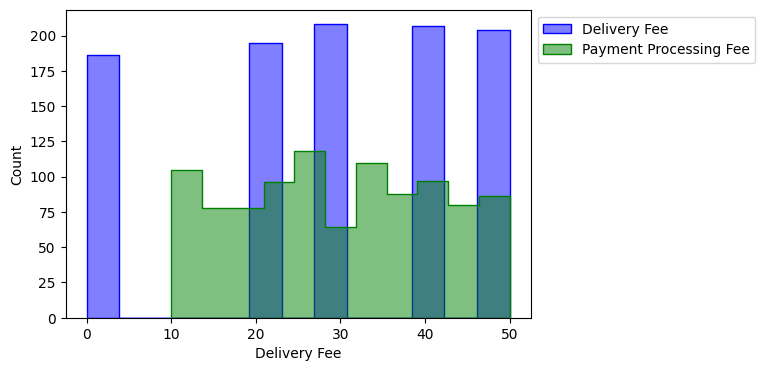

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(data['Delivery Fee'], kde=False, color='blue', label='Delivery Fee', alpha=0.5, element="step")
sns.histplot(data['Payment Processing Fee'], kde=False, color='green', label='Payment Processing Fee', alpha=0.5, element="step")

plt.legend(loc='upper left', bbox_to_anchor=(1,1))

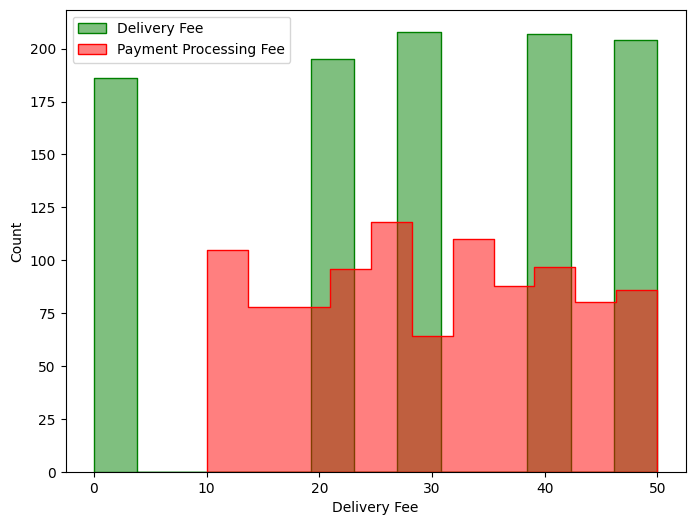

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(data['Delivery Fee'], kde=False, color='green', label='Delivery Fee', alpha=0.5, element="step")
sns.histplot(data['Payment Processing Fee'], kde=False, color='red', label='Payment Processing Fee', alpha=0.5, element="step")

plt.legend(loc='upper left')

In [11]:
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

In [12]:
data['Order Duration'] = (pd.to_datetime(data['Delivery Date and Time']) - pd.to_datetime(data['Order Date and Time'])).dt.total_seconds() / 60
data['Day of the Week'] = pd.to_datetime(data['Order Date and Time']).dt.day_name()
data['Time of Day'] = pd.to_datetime(data['Order Date and Time']).dt.hour.apply(lambda x: 'Morning' if 5 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Evening'))

In [21]:
data['year'] = pd.to_datetime(data['Order Date and Time']).dt.year

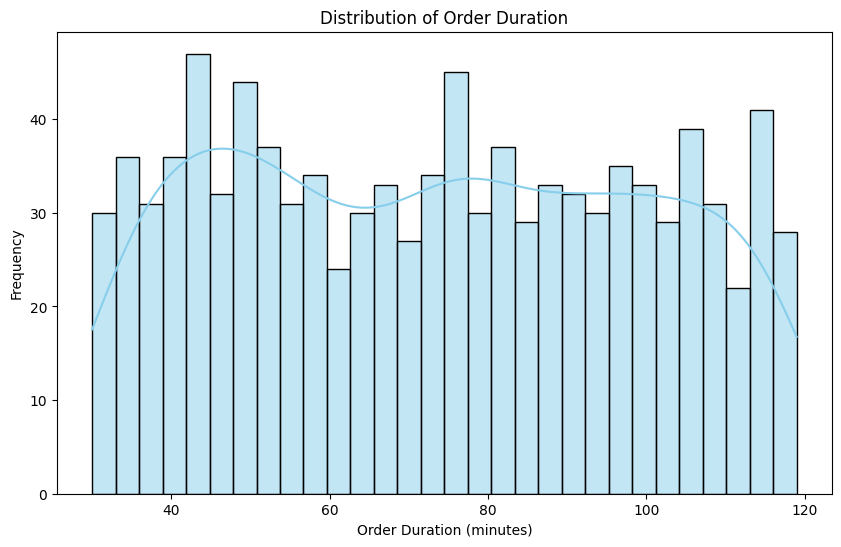

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Order Duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Order Duration')
plt.xlabel('Order Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-14-4c3b144e2575>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day of the Week', data=data, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


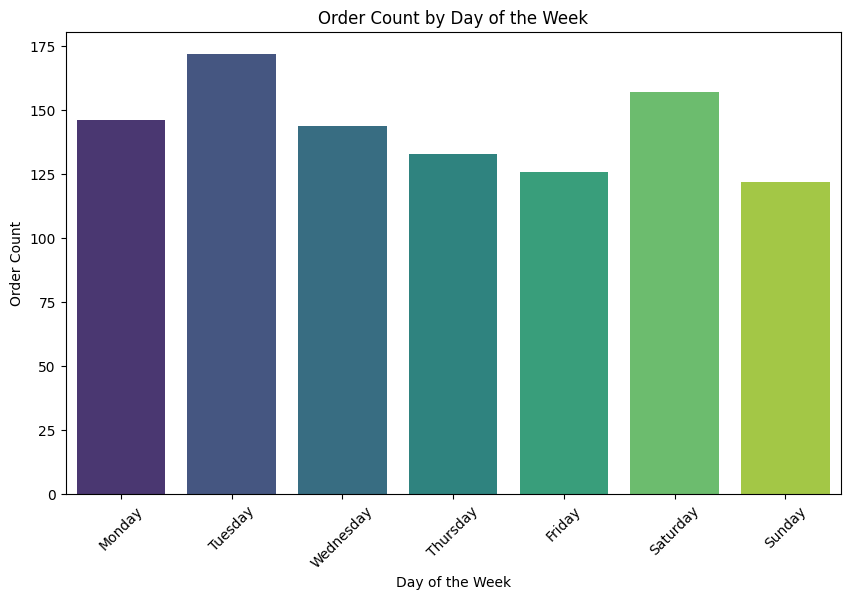

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of the Week', data=data, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Order Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-15-c52a8cc67bf7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Time of Day', data=data, palette='muted')


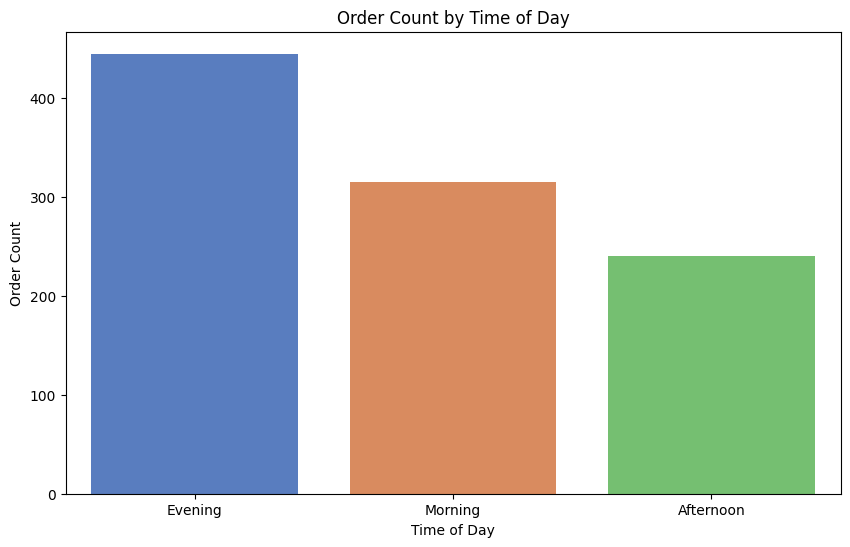

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Time of Day', data=data, palette='muted')
plt.title('Order Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Order Count')
plt.show()

most of the sales/deliveries occur during evening time.

In [40]:
data.to_csv('food_orders.csv')

In [39]:
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Order Duration,Day of the Week,Time of Day,year,Discount Value,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,88.0,Thursday,Evening,2024,5.0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,35.0,Friday,Evening,2024,10.0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,58.0,Wednesday,Morning,2024,15.0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,...,46.0,Tuesday,Evening,2024,NaN,NaN,NaN,NaN,146,NaN
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,89.0,Monday,Evening,2024,50.0,50.0,996.00,1076.00,130,-946.00
